### ***IMPORTANTE:*** Eu separei este projeto em duas seções. Na primeira seção, cumpri os requisitos da atividade, enquanto na segunda, implementei algumas melhorias para otimizar o desempenho do modelo.

# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Neste projeto, vamos realizar previsões de renda com o intuito de ajudar na mitigação do risco de crédito dos clientes presentes na base de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa, vamos identificar os tipos de dados que estamos tratando para desenvolver uma análise mais eficaz.


### Dicionário de dados

In [39]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(renda.groupby([var]).size())
metadata

,tipo,n_categorias
Unnamed: 0,int64,15000
data_ref,object,15
id_cliente,int64,9845
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5


In [40]:
pip install ydata_profiling

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
renda = pd.read_csv('previsao_de_renda.csv')

In [43]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [44]:

prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 62.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




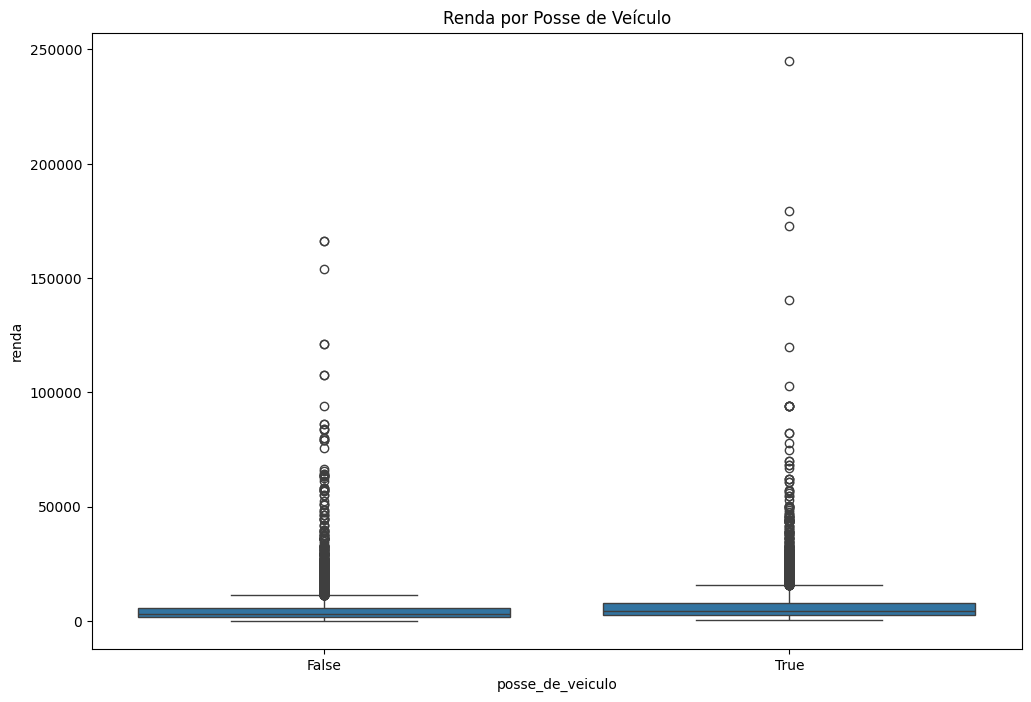

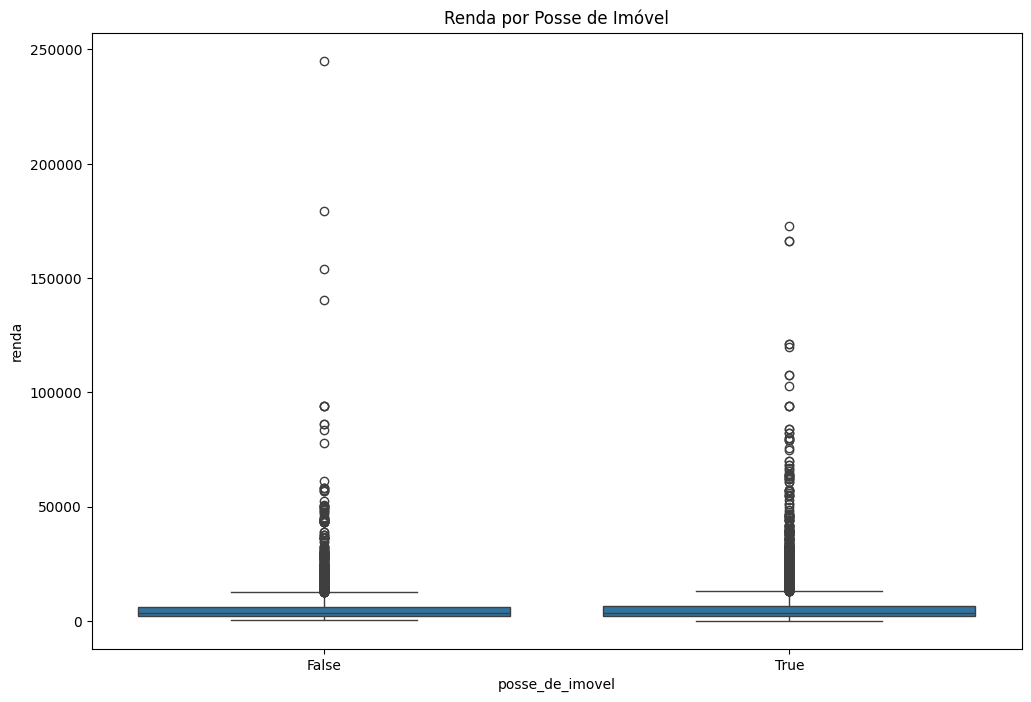

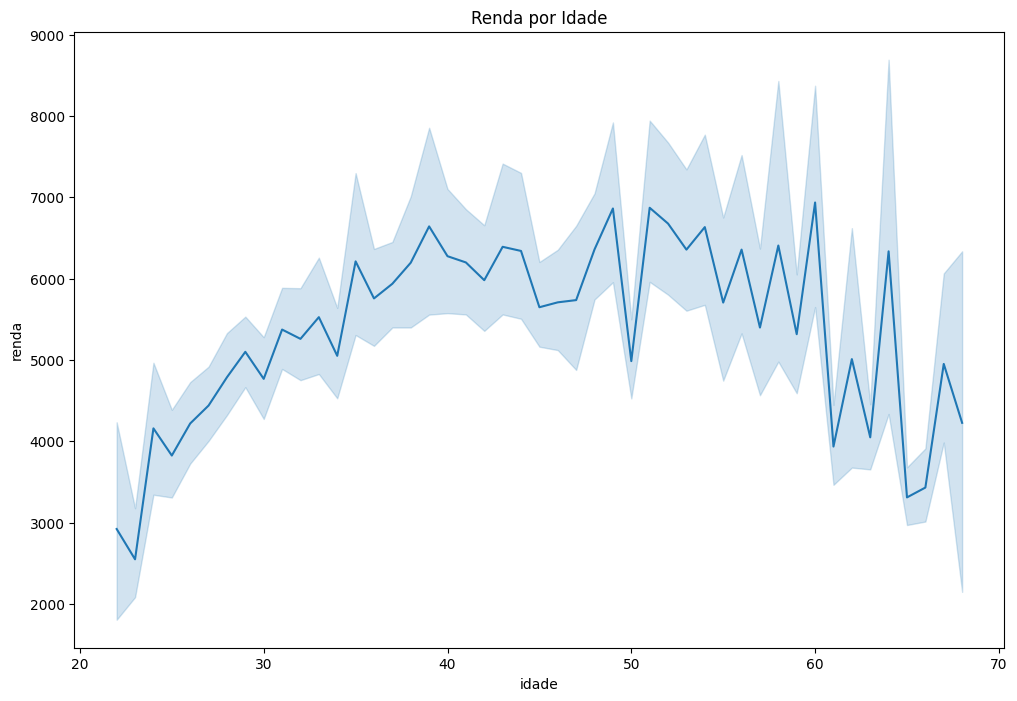

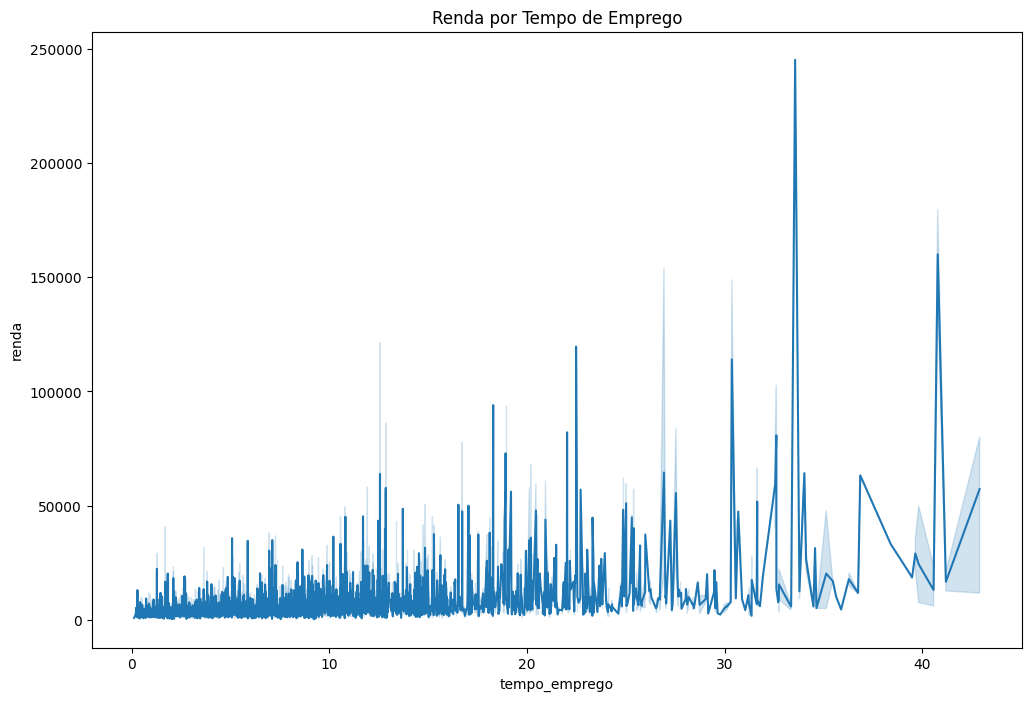

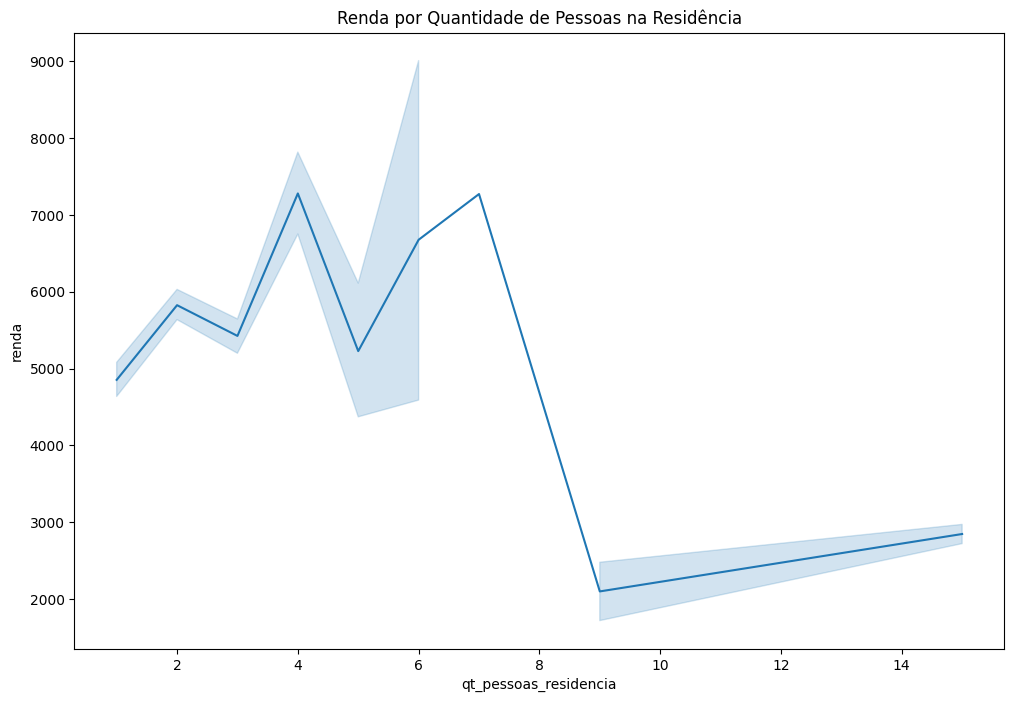

In [63]:
plt.rc('figure', figsize=(12, 8))

sns.boxplot(x='posse_de_veiculo', y='renda', data=renda)
plt.title('Renda por Posse de Veículo')
plt.show()

sns.boxplot(x='posse_de_imovel', y='renda', data=renda)
plt.title('Renda por Posse de Imóvel')
plt.show()

sns.lineplot(x='idade', y='renda', data=renda)
plt.title('Renda por Idade')
plt.show()

sns.lineplot(x='tempo_emprego', y='renda', data=renda)
plt.title('Renda por Tempo de Emprego')
plt.show()

sns.lineplot(x='qt_pessoas_residencia', y='renda', data=renda)
plt.title('Renda por Quantidade de Pessoas na Residência')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

- **seleção**: Já temos os dados selecionados adequadamente?
- **limpeza**: Precisaremos identificar e tratar dados faltantes
- **construção**: construção de novas variáveis
- **integração**: Temos apenas uma fonte de dados, não é necessário integração
- **formatação**: Os dados já se encontram em formatos úteis?

### Seleção de Dados

Aqui, estamos removendo as colunas 'Unnamed: 0', 'id_cliente' e 'data_ref', pois elas podem não ser úteis para o modelo. A coluna 'Unnamed: 0' parece ser um índice, 'id_cliente' tem muitos valores únicos, e 'data_ref' precisaria de transformação para ser usada no modelo.

In [47]:

renda_selecionada = renda.drop(['Unnamed: 0', 'id_cliente', 'data_ref'], axis=1)
display(renda_selecionada.head())

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [48]:
print(renda_selecionada.isnull().sum())

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


### Limpeza de Dados

In [49]:
# Substituindo os valores faltantes pela media usando o fillna()
median_tempo_emprego = renda_selecionada['tempo_emprego'].median()
renda_selecionada['tempo_emprego'].fillna(median_tempo_emprego, inplace=True)

# verificando se deu certo
print(renda_selecionada.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


/tmp/ipython-input-920723373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda_selecionada['tempo_emprego'].fillna(median_tempo_emprego, inplace=True)


### Construção de Novas Variáveis


Estabelecemos uma nova variável denominada 'grupo_idade', extraída da coluna 'idade', com o objetivo de auxiliar o modelo na identificação de padrões de renda em diversas categorias etárias.

In [50]:

bins = [0, 25, 35, 50, 65, 100]
labels = ['0-25', '26-35', '36-50', '51-65', '66+']
renda_selecionada['grupo_idade'] = pd.cut(renda_selecionada['idade'], bins=bins, labels=labels, right=False)

display(renda_selecionada.head())

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,grupo_idade
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,26-35
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,26-35
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,36-50
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,26-35
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,26-35


### Formatação de Dados

In [51]:
# Identificando as colunas categoricas (excluindo a váriavel 'renda')
categorical_cols = renda_selecionada.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_cols = categorical_cols.drop('renda', errors='ignore')


renda_formatada = pd.get_dummies(renda_selecionada, columns=categorical_cols, drop_first=True)

display(renda_formatada.head())

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,grupo_idade_26-35,grupo_idade_36-50,grupo_idade_51-65,grupo_idade_66+
0,0,26,6.602740,1.0,8060.34,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
1,0,28,7.183562,2.0,1852.15,True,True,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,0,35,0.838356,2.0,2253.89,False,True,True,False,True,...,False,True,False,False,False,False,False,True,False,False
3,1,30,4.846575,3.0,6600.77,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0,33,4.293151,1.0,6475.97,True,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


A técnica de modelagem escolhida foi a regressão linear.

### Rodando o modelo


A técnica de modelagem escolhida foi a regressão linear.

In [52]:


# Separating features (X) and target (y)
X = renda_formatada.drop('renda', axis=1)
y = renda_formatada['renda']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12000, 28)
Shape of X_test: (3000, 28)
Shape of y_train: (12000,)
Shape of y_test: (3000,)


In [53]:

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Analisando a eficácia do modelo de Regressão por meio das métricas: ***MSE, MAE e R-quadrado.***



- **Erro Quadrático Médio (MSE):** Mede a média dos quadrados dos erros. Erros maiores têm um peso maior. Um MSE menor indica um melhor ajuste do modelo.
- **Erro Médio Absoluto (MAE):** Mede a média dos valores absolutos dos erros. É menos sensível a outliers do que o MSE. Um MAE menor indica um melhor ajuste do modelo.
- **R-squared (Coeficiente de Determinação):** Representa a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Varia de 0 a 1. Um R-squared mais próximo de 1 indica que o modelo explica uma maior proporção da variância dos dados.

In [54]:


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 34482217.988583945
Mean Absolute Error (MAE): 3494.9395446564904
R-squared (R2): 0.29628256525263374


## Etapa 5 Crisp-DM: Avaliação dos resultados


#### Avaliação do Modelo de Regressão Linear

Com base nas métricas calculadas para o modelo de Regressão Linear:

*   **Erro Quadrático Médio (MSE):** {{34482217.9}}
*   **Erro Médio Absoluto (MAE):** {{3494.9}}
*   **R-squared (R2):** {{0.29}}

Estes resultados indicam que o modelo de Regressão Linear explica aproximadamente 0.29 da variância na renda. O MAE de 3494.9 sugere que, em média, as previsões do modelo estão a cerca de 3494.9 unidades monetárias do valor real da renda. O MSE, por ser mais sensível a erros maiores, apresenta um valor elevado.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [55]:
# Exemplo de como fazer previsões sobre novos dados usando o melhor modelo

# Para fins de demonstração, vamos criar uma amostra de dados "novos"
# Em um cenário real, seriam novos dados entrando no sistema
# Usaremos algumas linhas do conjunto de teste como exemplo
new_data_sample = X_test_no_outliers.head()


predictions_on_new_data = rf_model_optimized.predict(new_data_sample)


print("Novos Dados (Amostra):")
display(new_data_sample)
print("\nPrevisões de Renda para os Novos Dados:")
print(predictions_on_new_data)

Novos Dados (Amostra):


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,grupo_idade_26-35,grupo_idade_36-50,grupo_idade_51-65,grupo_idade_66+
11950,0,27,1.260274,2.0,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2242,1,38,0.506849,3.0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
12461,0,43,3.783562,1.0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
11953,0,62,6.013699,1.0,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2326,0,32,13.865753,2.0,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False



Previsões de Renda para os Novos Dados:
[1360.24801856 1766.75308999 2445.32949908 3442.2007027  2934.53273701]


### ***A seguir, fiz algumas otimizações de desempenho.***

***O MSE apresentou valores elevados, mesmo após a aplicação de técnicas de aprimoramento, o que levou à sua exclusão do modelo de regressão linear.***

## Explorar outras técnicas de modelagem

Treinar e avaliar um modelo RandomForestRegressor nos dados de treino.


In [56]:
# 1. Instantiate a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate evaluation metrics

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 5. Print the evaluation metrics

print(f"RandomForestRegressor - Mean Absolute Error (MAE): {mae_rf}")
print(f"RandomForestRegressor - R-squared (R2): {r2_rf}")

RandomForestRegressor - Mean Absolute Error (MAE): 2887.462075713264
RandomForestRegressor - R-squared (R2): 0.3272782317978963


## Melhorar a preparação dos dados




In [57]:
# Selecionando apenas colunas numericas
numerical_cols = renda_selecionada.select_dtypes(include=['int64', 'float64']).columns

# Calculando Q1, Q3, e IQR para cada coluna numerica
Q1 = renda_selecionada[numerical_cols].quantile(0.25)
Q3 = renda_selecionada[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bounds:\n", lower_bound)
print("\nUpper Bounds:\n", upper_bound)

Lower Bounds:
 qtd_filhos                 -1.500000
idade                       5.500000
tempo_emprego              -4.435616
qt_pessoas_residencia       0.500000
renda                   -4522.976250
dtype: float64

Upper Bounds:
 qtd_filhos                   2.50000
idade                       81.50000
tempo_emprego               17.00000
qt_pessoas_residencia        4.50000
renda                    12941.25375
dtype: float64


In [58]:
# Removendo outliers do dataframe
shape_before = renda_selecionada.shape


renda_no_outliers = renda_selecionada[~((renda_selecionada[numerical_cols] < lower_bound) | (renda_selecionada[numerical_cols] > upper_bound)).any(axis=1)]


shape_after = renda_no_outliers.shape

print("Shape before removing outliers:", shape_before)
print("Shape after removing outliers:", shape_after)

Shape before removing outliers: (15000, 13)
Shape after removing outliers: (12787, 13)





Aplicar a mesma lógica de feature engineering (criação da coluna 'grupo_idade') e formatação de dados (One-Hot Encoding para colunas categóricas) no DataFrame `renda_no_outliers`.


**Reasoning**:
Criar a coluna 'grupo_idade' e aplicar One-Hot Encoding no DataFrame `renda_no_outliers`.



In [59]:
bins = [0, 25, 35, 50, 65, 100]
labels = ['0-25', '26-35', '36-50', '51-65', '66+']
renda_no_outliers['grupo_idade'] = pd.cut(renda_no_outliers['idade'], bins=bins, labels=labels, right=False)

categorical_cols_no_outliers = renda_no_outliers.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_cols_no_outliers = categorical_cols_no_outliers.drop('renda', errors='ignore')

renda_formatada_no_outliers = pd.get_dummies(renda_no_outliers, columns=categorical_cols_no_outliers, drop_first=True)

display(renda_formatada_no_outliers.head())

/tmp/ipython-input-3159808098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_no_outliers['grupo_idade'] = pd.cut(renda_no_outliers['idade'], bins=bins, labels=labels, right=False)


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,grupo_idade_26-35,grupo_idade_36-50,grupo_idade_51-65,grupo_idade_66+
0,0,26,6.602740,1.0,8060.34,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
1,0,28,7.183562,2.0,1852.15,True,True,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,0,35,0.838356,2.0,2253.89,False,True,True,False,True,...,False,True,False,False,False,False,False,True,False,False
3,1,30,4.846575,3.0,6600.77,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0,33,4.293151,1.0,6475.97,True,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False


## Explorar outras técnicas de modelagem


Treinar e avaliar um modelo RandomForestRegressor utilizando o DataFrame `renda_formatada_no_outliers`, que teve os outliers removidos e novas features criadas.


In [60]:
# Separating features (X) and target (y)
X_no_outliers = renda_formatada_no_outliers.drop('renda', axis=1)
y_no_outliers = renda_formatada_no_outliers['renda']

# Splitting data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Instantiating a RandomForestRegressor object
rf_model_no_outliers = RandomForestRegressor(random_state=42)

# Training the model
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Making predictions on the test data
y_pred_rf_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

# Calculating evaluation metrics

mae_rf_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_rf_no_outliers)
r2_rf_no_outliers = r2_score(y_test_no_outliers, y_pred_rf_no_outliers)

# Printing the evaluation metrics
print(f"RandomForestRegressor (No Outliers) - Mean Absolute Error (MAE): {mae_rf_no_outliers}")
print(f"RandomForestRegressor (No Outliers) - R-squared (R2): {r2_rf_no_outliers}")

RandomForestRegressor (No Outliers) - Mean Absolute Error (MAE): 1658.4177460205499
RandomForestRegressor (No Outliers) - R-squared (R2): 0.2948385084184455


## Otimizar hiperparâmetros

Otimizar os hiperparâmetros do modelo RandomForestRegressor utilizando `GridSearchCV` no conjunto de treino (`X_train_no_outliers`, `y_train_no_outliers`) para encontrar a melhor combinação e melhorar o desempenho do modelo.


**Reasoning**:
Otimizar os hiperparâmetros do modelo RandomForestRegressor utilizando GridSearchCV no conjunto de treino (`X_train_no_outliers`, `y_train_no_outliers`) para encontrar a melhor combinação e melhorar o desempenho do modelo.



In [61]:


# Definir um dicionário param_grid com os hiperparâmetros e os valores a serem testados
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

# Instanciar um objeto RandomForestRegressor com random_state=42
rf = RandomForestRegressor(random_state=42)

# Instanciar um objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Ajustar o objeto GridSearchCV aos dados de treino sem outliers
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

# Imprimir os melhores hiperparâmetros encontrados e a melhor pontuação de validação cruzada
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Pontuação (MAE Negativo):", grid_search.best_score_)

Melhores Hiperparâmetros: {'max_depth': 20, 'n_estimators': 200}
Melhor Pontuação (MAE Negativo): -1663.2590786003543


In [62]:
# Implementando o modelo RandomForestRegressor otimizado para tomar decisões automatizadas

# Para fins de demonstração, vamos criar uma amostra de dados "novos"
# Em um cenário real, seriam novos dados entrando no sistema
# Usaremos algumas linhas do conjunto de teste sem outliers como exemplo
new_data_sample_rf = X_test_no_outliers.head()

# Fazer previsões nos novos dados usando o modelo RandomForestRegressor otimizado
predictions_on_new_data_rf = rf_model_optimized.predict(new_data_sample_rf)

# Exibir os novos dados e as previsões
print("Novos Dados (Amostra para RandomForestRegressor):")
display(new_data_sample_rf)
print("\nPrevisões de Renda para os Novos Dados (RandomForestRegressor Otimizado):")
print(predictions_on_new_data_rf)

Novos Dados (Amostra para RandomForestRegressor):


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,grupo_idade_26-35,grupo_idade_36-50,grupo_idade_51-65,grupo_idade_66+
11950,0,27,1.260274,2.0,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2242,1,38,0.506849,3.0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
12461,0,43,3.783562,1.0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
11953,0,62,6.013699,1.0,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2326,0,32,13.865753,2.0,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False



Previsões de Renda para os Novos Dados (RandomForestRegressor Otimizado):
[1360.24801856 1766.75308999 2445.32949908 3442.2007027  2934.53273701]




#### Analise do modelo após otimização do modelo de Regressão linear

*   O modelo `RandomForestRegressor` inicial treinado em dados com outliers alcançou um R² de 0.327, um MAE de aproximadamente 2887.
*   A identificação e remoção de outliers resultou na exclusão de 2213 linhas, representando cerca de 14.75% do DataFrame original.
*   Após a remoção de outliers e a aplicação de feature engineering e One-Hot Encoding, o DataFrame `renda_formatada_no_outliers` foi criado para a modelagem.
*   O modelo `RandomForestRegressor` treinado nos dados sem outliers (mas sem otimização de hiperparâmetros) apresentou métricas significativamente melhores em comparação com o modelo treinado em dados com outliers: MAE de 1658.42 e R² de 0.295.
*   A otimização de hiperparâmetros usando `GridSearchCV` identificou `{'max_depth': 20, 'n_estimators': 200}` como a melhor combinação, resultando em uma melhor pontuação de validação cruzada (MAE negativo) de aproximadamente -1663.26.
*   O modelo `RandomForestRegressor` com hiperparâmetros otimizados e treinado nos dados sem outliers apresentou um desempenho ligeiramente melhor do que o modelo sem otimização nos dados sem outliers, com MAE de 1654.47 e R² de 0.3064.

#### Insights

*   A remoção de outliers teve um impacto substancial na melhoria das métricas de erro (redução significativa de MAE) para o modelo `RandomForestRegressor`.
*   A otimização de hiperparâmetros trouxe uma melhora marginal adicional no desempenho do `RandomForestRegressor` em comparação com a versão sem otimização após o tratamento de outliers.
